# Juego de caos para *A. thaliana*

### Visualizar fractales de secuencias

In [1]:
import numpy as np
from numpy import array
from random import choice
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

##### Constantes

In [2]:
v1 = (0.,0.)
v2 = (0.,1.)
v3 = (1., 0.)
v4 = (1., 1.)

##### Crear diccionario

In [3]:
C = { 'A':v1, 'C':v2, 'T':v3, 'G':v4, 'Y':v2} 
C['Y']

(0.0, 1.0)

In [4]:
iters = int(1e10)

###### Funciones auxiliares

In [5]:
def read_fasta(fname):
    f = open(fname, 'r')
    L = ''
    for linea in f:
        if(linea[0] != '>'):
            L += ( linea.strip() ) #strip quita enter y tabuladores
    return L

gen_a_thal=read_fasta('Arabidopsis_thaliana_nt.fasta')

In [6]:
athal = read_fasta('Arabidopsis_thaliana_nt.fasta')
len(athal)

16806804

###### Definir funcion que calcule el punto medio

In [7]:
def pmedio( t1, t2):
    x1, y1 = t1
    x2, y2 = t2
    z1 = (x1+x2)/2.0
    z2 = (y1+y2)/2.0
    return (z1,z2)

c = pmedio(v1,v4)
print(c)
print(v1,v4)

(0.5, 0.5)
(0.0, 0.0) (1.0, 1.0)


###### Programa principal

In [8]:
def caos_dna( sec, coords, iters ):
    P = [coords[sec[0]] ]
    for i in range(iters):
        vact = P[-1]
        pact = coords[sec[i]]
        psig = pmedio(vact,pact)
        P.append(psig)
    return array(P)

In [9]:
conjunto = caos_dna(gen_a_thal, C, len(gen_a_thal))

In [10]:
conjunto[:10,1]

array([0.       , 0.       , 0.       , 0.5      , 0.75     , 0.375    ,
       0.6875   , 0.84375  , 0.421875 , 0.2109375])

In [11]:
def graf_pts(D,umbral):
    plt.scatter(D[:umbral+1,0], D[:umbral+1,1],s=1)
    plt.show()

In [12]:
jc_at = caos_dna (gen_a_thal, C, len(gen_a_thal))

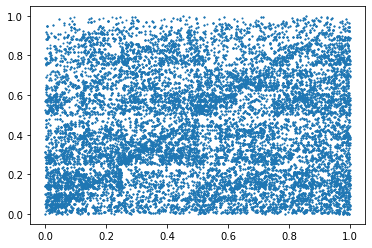

In [13]:
plt.clf()
graf_pts(jc_at,30000)

In [14]:
e_coli = read_fasta('Escherichia_coli_nt.fasta')    
#lower()->minusculas
len(e_coli)

4089513

In [15]:
jc_ec = caos_dna ( e_coli, C, len(e_coli))

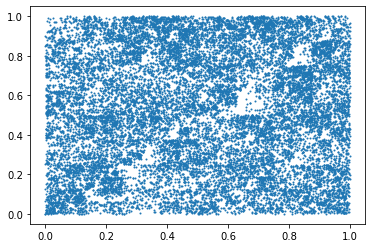

In [19]:
plt.clf()
graf_pts(jc_ec,20000)

In [20]:
m_mus = read_fasta('M_musculus_nt.fasta')    
#lower()->minusculas
len(m_mus)

205547

In [21]:
jc_mm = caos_dna ( m_mus, C, len(m_mus))

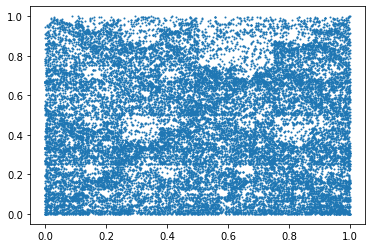

In [25]:
plt.clf()
graf_pts(jc_mm,25000)